<a href="https://colab.research.google.com/github/shrikant280304/FMML_PROJECTS_AND_LABS/blob/main/M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

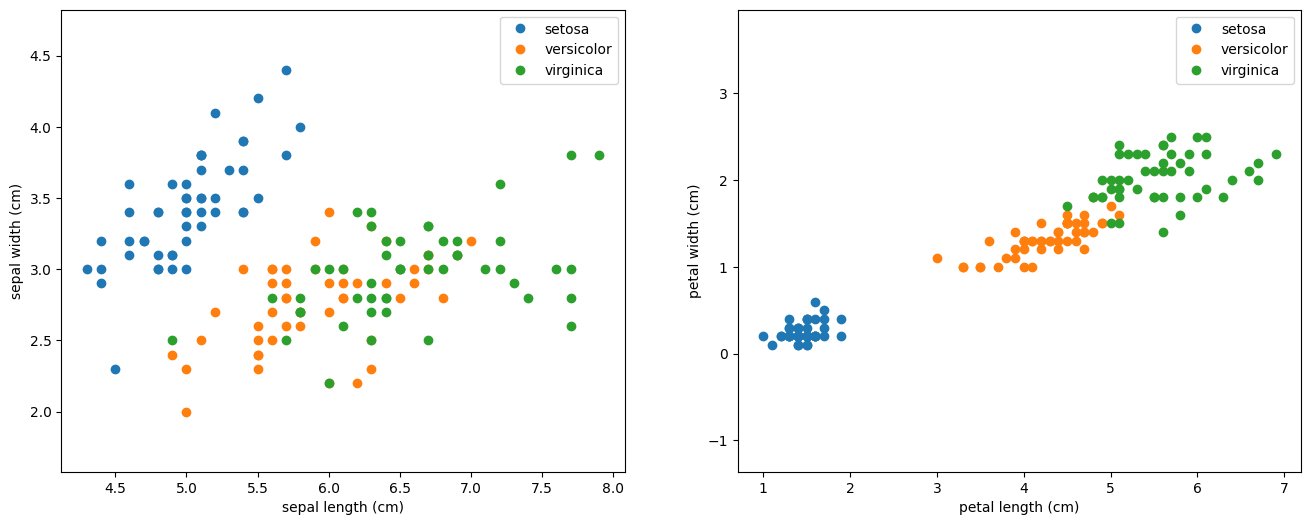

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 502.25it/s]


# Plot training progress

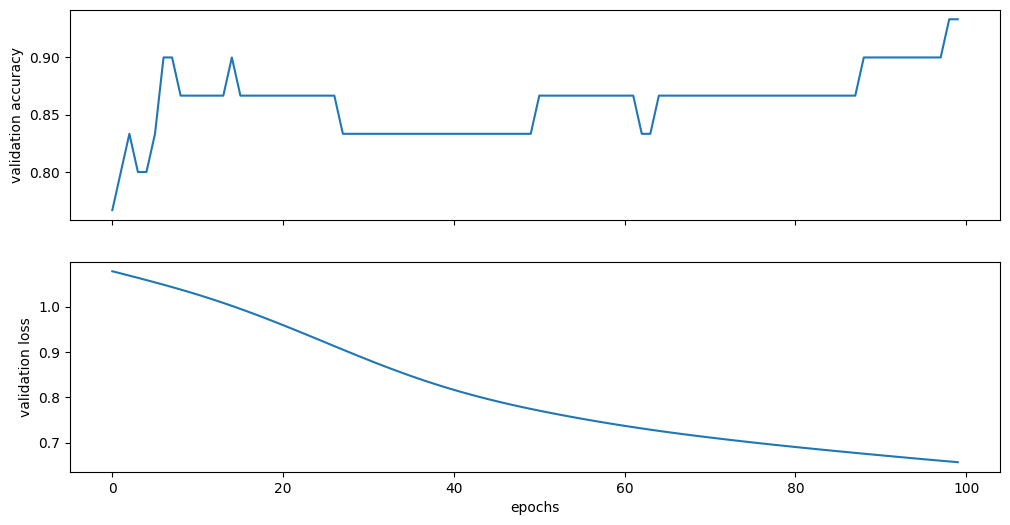

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


**Q1) Try changing the number of hidden layers.**

100%|██████████| 100/100 [00:00<00:00, 367.45it/s]


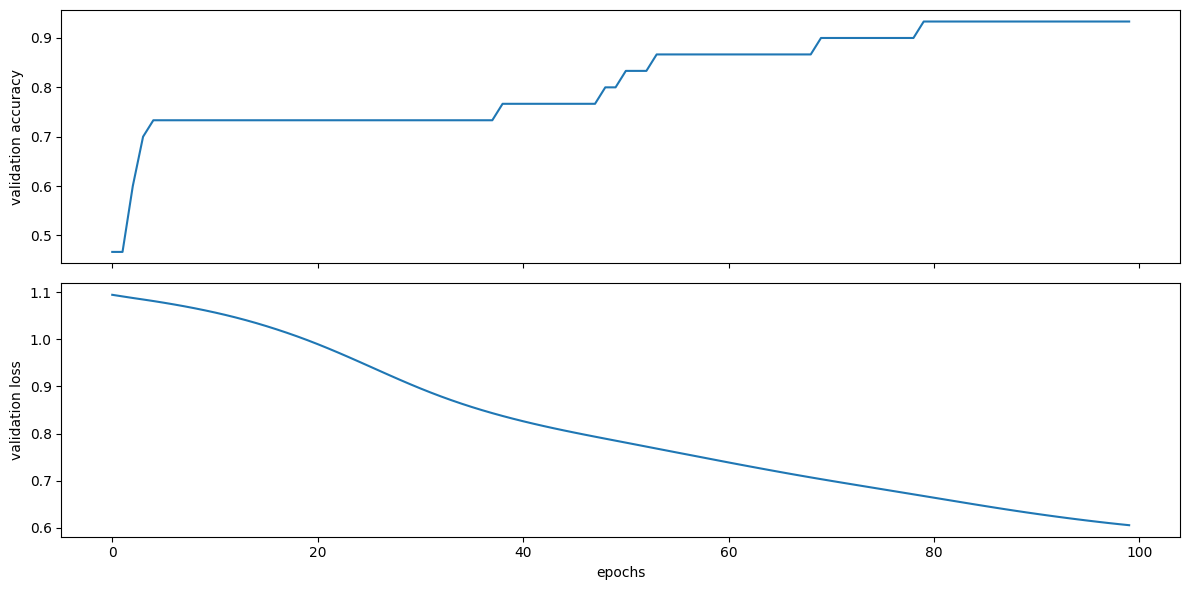

In [9]:
# Three hidden layers
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS = 100
#X_train = torch.from_numpy(X_train).float()
#X_test = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test = torch.from_numpy(y_test)

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:00<00:00, 432.91it/s]


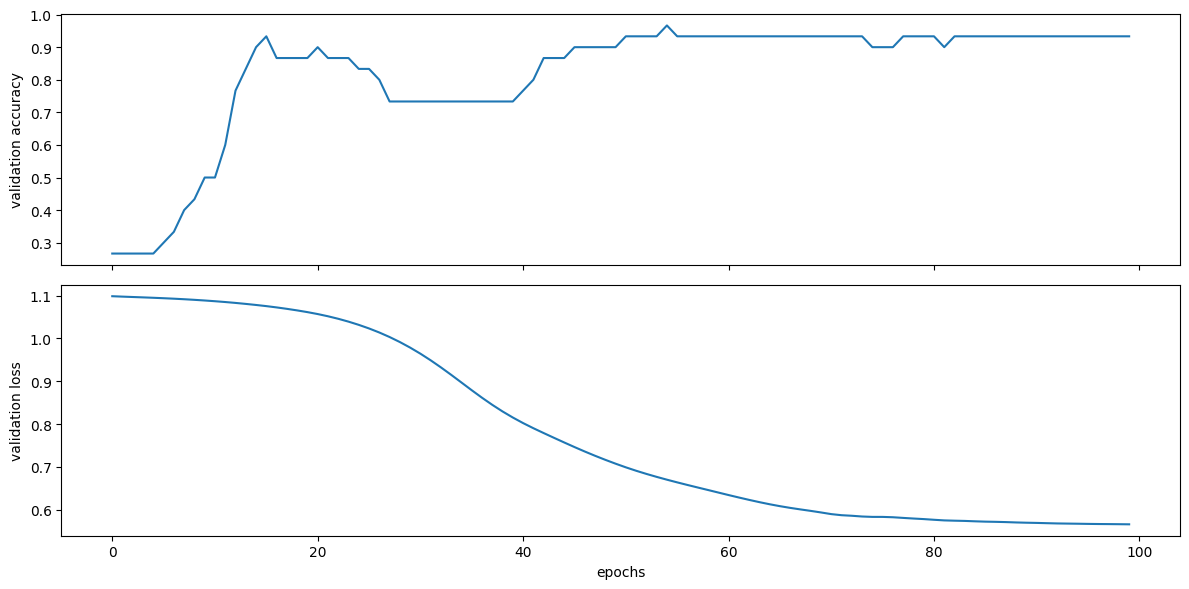

In [10]:
# 5 Hidden Layers
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 50)
        self.layer5 = nn.Linear(50, 50)
        self.layer6 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x
# Instantiate model, optimizer, and loss function
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS = 100
#X_train = torch.from_numpy(X_train).float()
#X_test = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test = torch.from_numpy(y_test)

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


**Q2)** **Try changing the number of neurons in the hidden layer.**


100%|██████████| 100/100 [00:00<00:00, 609.67it/s]


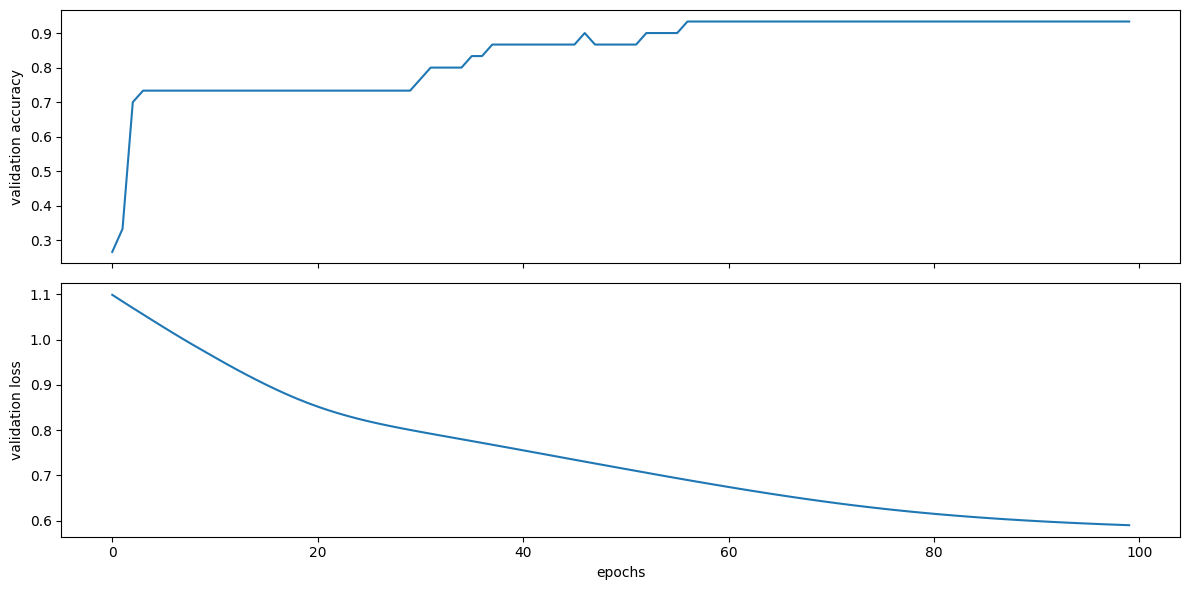

In [11]:
# Hidden Layer 1: 128 neurons
# Hidden Layer 2: 64 neurons

# Output Layer: 3 neurons

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test  = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test  = torch.from_numpy(y_test)

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()



100%|██████████| 100/100 [00:00<00:00, 753.83it/s]


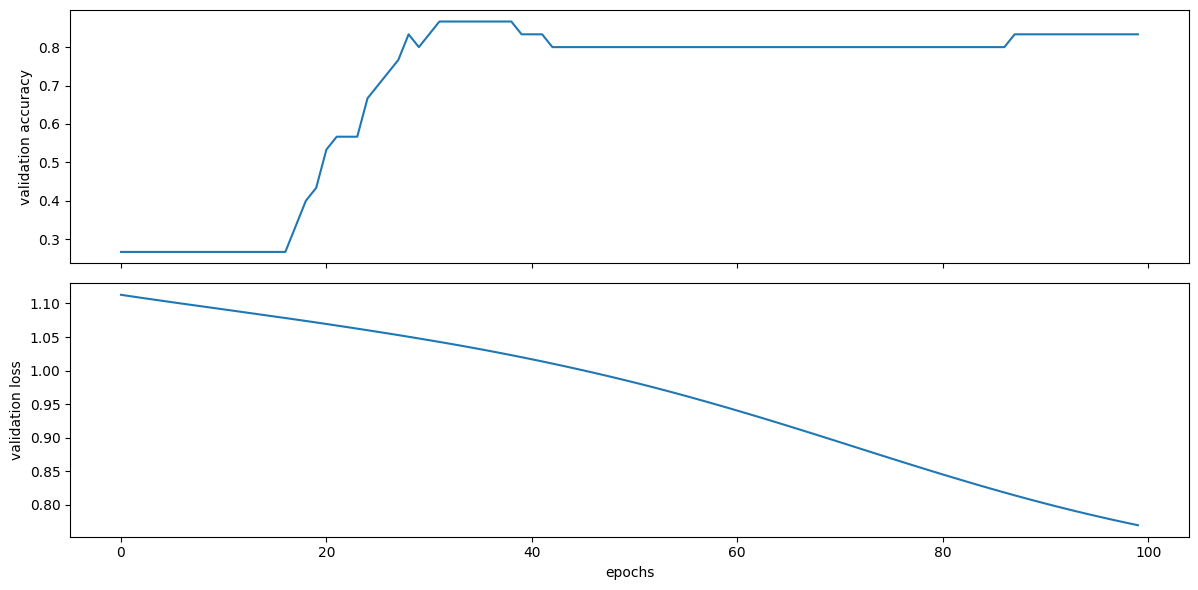

In [12]:
# Hidden Layer 1: 32 neurons
# Hidden Layer 2: 16 neurons

# Output Layer: 3 neurons

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test  = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test  = torch.from_numpy(y_test)

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()



**Q3) Try using a different activation function.**

100%|██████████| 100/100 [00:00<00:00, 695.23it/s]


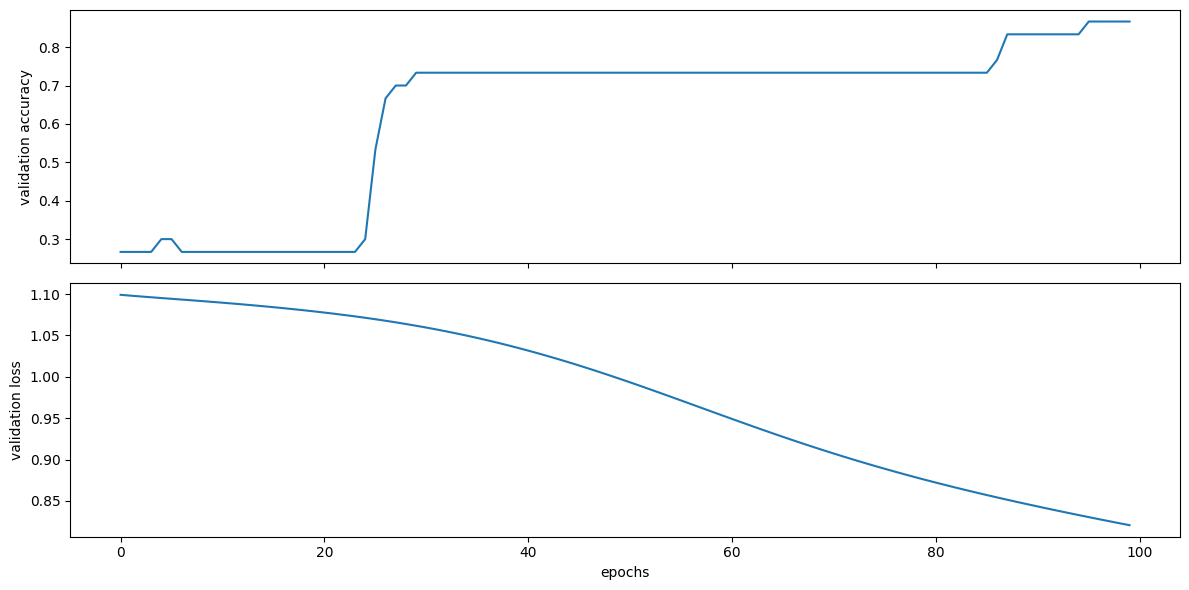

In [13]:
# Sigmoid Function

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test  = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test  = torch.from_numpy(y_test)

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:00<00:00, 657.08it/s]


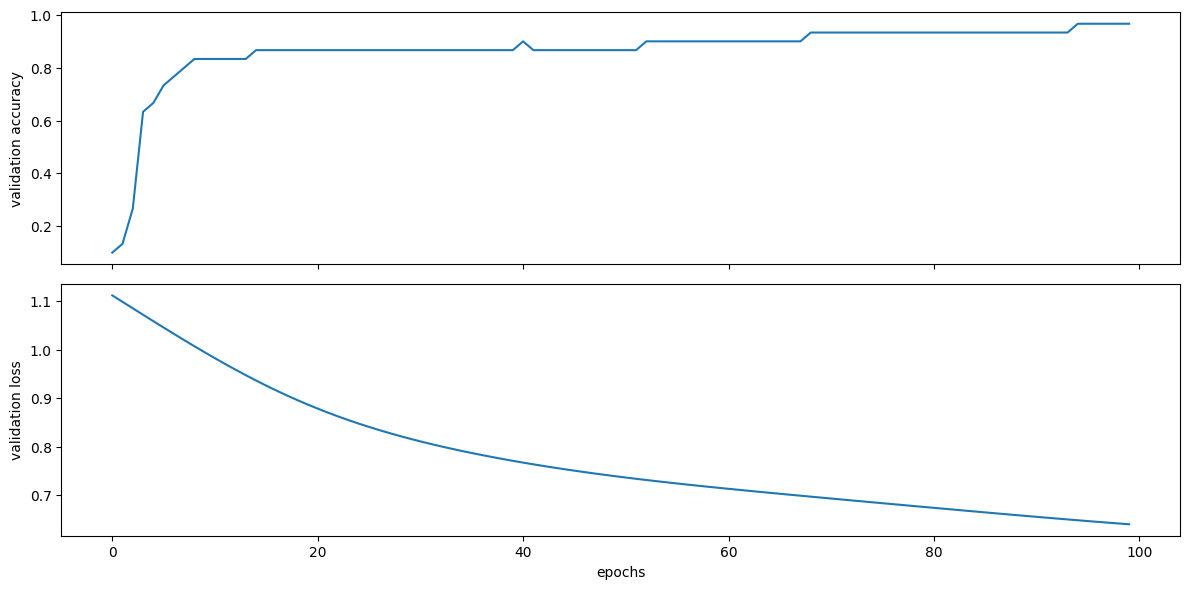

In [14]:
# Tanh Function
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test  = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test  = torch.from_numpy(y_test)

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


**Q4) Can you observe any changes?**

**Observations:**

**Hidden Layers**
- (The model architecture with two hidden layers was provided in the assignment itself).
- The rate of getting high validation accuracy was observed as:
5 Layers > 3 Layers > 2 Layers
- The validation loss decreased significantly with 5 hidden layers, at around 60 epochs. In comparison, it took about 80 epochs with 3 hidden layers and nearly 90 epochs with 2 hidden layers to reduce loss.
--------
**Different Number of Neurons**
- Validation accuracy was better in the case of high number of neurons (128, 64, 3) since it reached a the highest accuracy the fastest and was more plateau-like throughout. Whereas the neural network with (32, 16,3) had fluctuations and took time to achieve high accuracy.
- The neural network with (128, 64, 3) learns faster and better, since validation loss drops significantly in the first 30-40 epochs and flattens later.
------
**Different Activation Functions**
- tanh activation function achieved faster validation accuracy earlier in training, as compared to relu and sigmoid.
- For validation loss, tanh showed the fastest and smoothest decrease in validation loss, followed by ReLU, while sigmoid had a slower and more fluctuating decline



**Experimenting with changing all three parameters at once.**

100%|██████████| 100/100 [00:00<00:00, 594.30it/s]


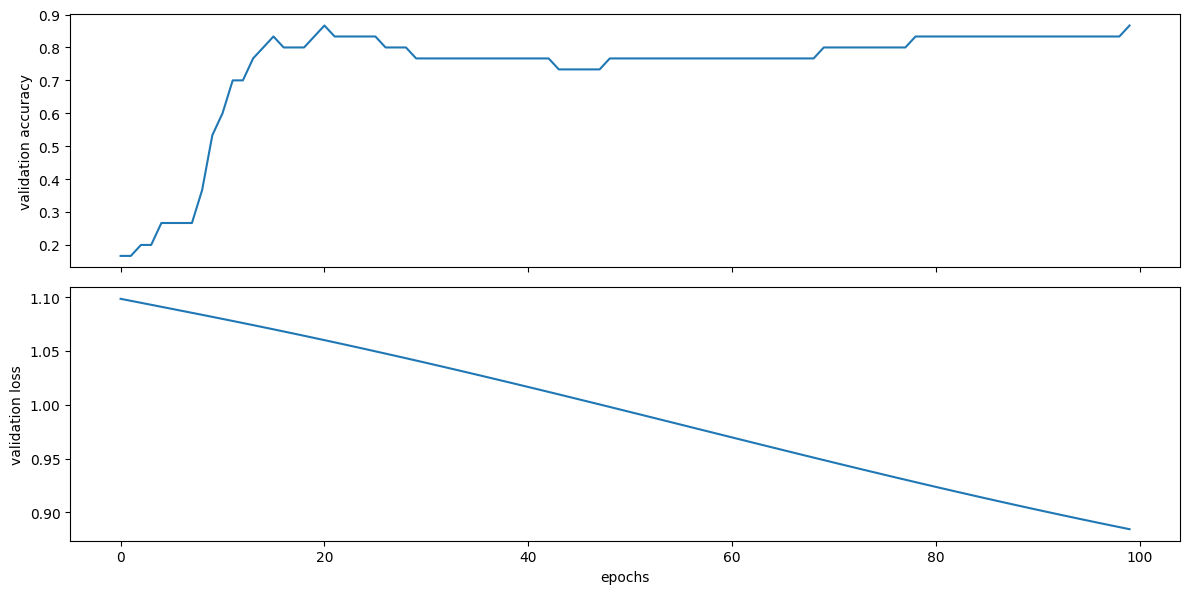

In [15]:
# Model Architecture
# Number of hidden layers = 1

# Hidden Layer 1: 50 neurons, sigmoid

# Layer 2 (Output Layer): 3 neurons, softmax

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x
# Instantiate model, optimizer, and loss function
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS = 100
#X_train = torch.from_numpy(X_train).float()
#X_test = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test = torch.from_numpy(y_test)

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:00<00:00, 557.91it/s]


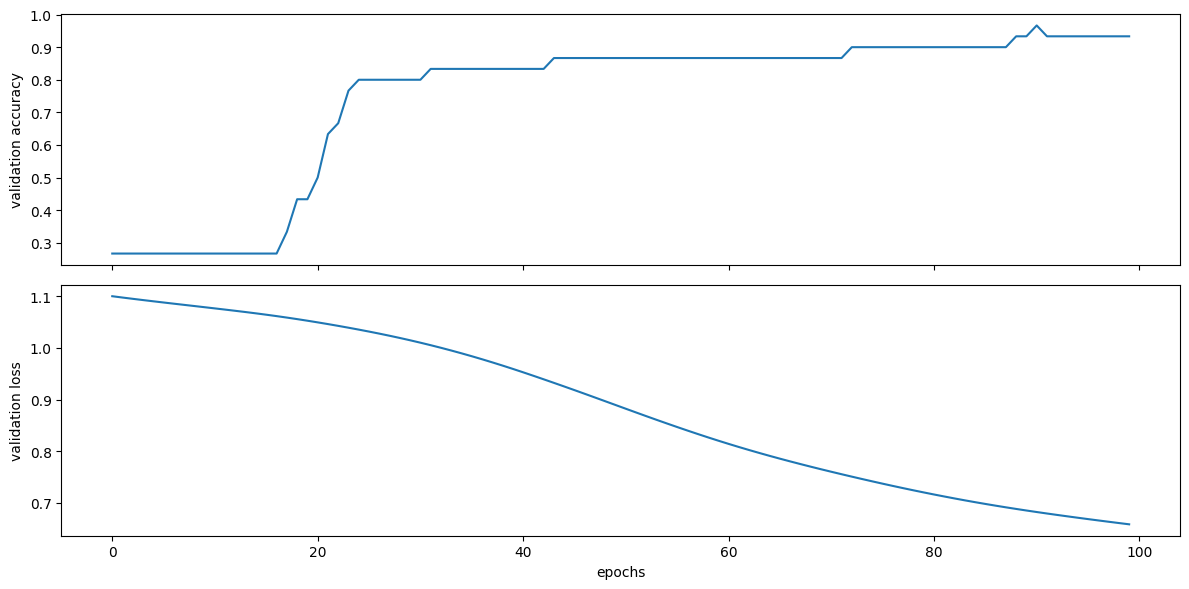

In [16]:
# Model Architecture
# Number of hidden layers = 3

# Hidden Layer 1: 50 neurons, tanh
# Hidden Layer 2: 14 neurons, elu
# Hidden Layer 3: 20 neurons, leaky_relu

# Layer 4 (Output Layer): 3 neurons, softmax


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 14)
        self.layer3 = nn.Linear(14, 20)
        self.layer4 = nn.Linear(20, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = F.elu(self.layer2(x))
        x = F.leaky_relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x

# Instantiate model, optimizer, and loss function
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS = 100
#X_train = torch.from_numpy(X_train).float()
#X_test = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test = torch.from_numpy(y_test)

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:00<00:00, 330.62it/s]


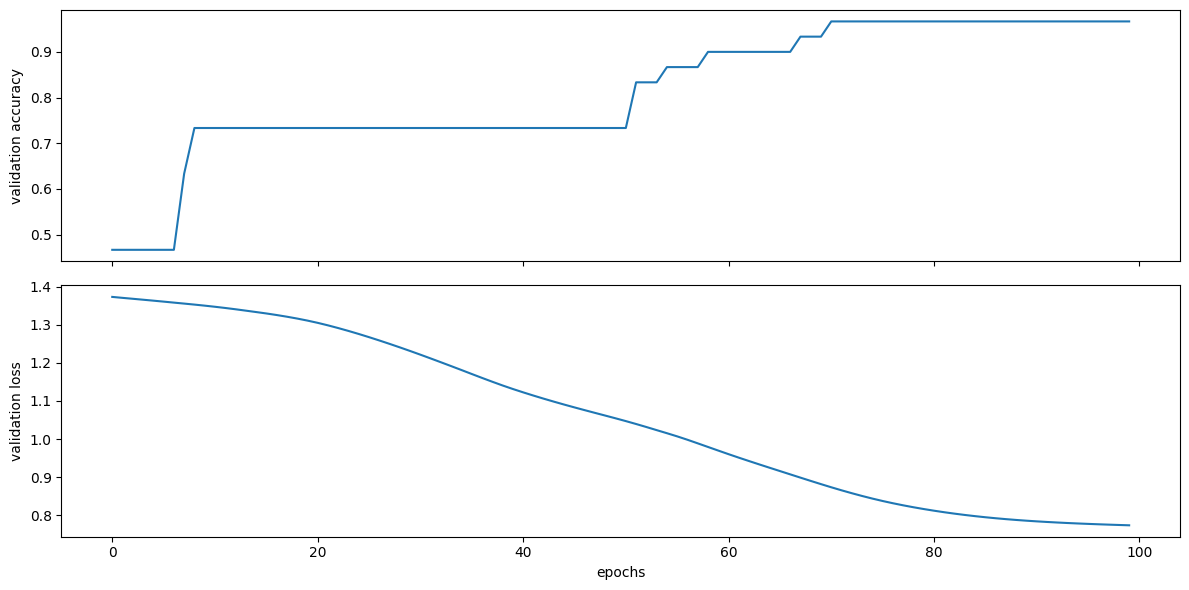

In [17]:
# Model Architecture
# Number of hidden layers = 5

# Hidden Layer 1: 128 neurons, relu
# Hidden Layer 2: 84 neurons, sigmoid
# Hidden Layer 3: 64 neurons, leaky_relu
# Hidden Layer 4: 20 neurons, gelu
# Hidden Layer 5: 10 neurons, selu

# Layer 6 (Output Layer): 4 neurons, softmax


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 84)
        self.layer3 = nn.Linear(84, 64)
        self.layer4 = nn.Linear(64, 20)
        self.layer5 = nn.Linear(20, 10)
        self.layer6 = nn.Linear(10, 4)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        x = F.leaky_relu(self.layer3(x))
        x = F.gelu(self.layer4(x))
        x = F.selu(self.layer5(x))
        x = F.softmax(self.layer6(x), dim=1)
        return x


# Instantiate model, optimizer, and loss function
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Convert data to PyTorch tensors
EPOCHS = 100
#X_train = torch.from_numpy(X_train).float()
#X_test = torch.from_numpy(X_test).float()
#y_train = torch.from_numpy(y_train)
#y_test = torch.from_numpy(y_test)

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

# Training loop
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).float()
        accuracy_list[epoch] = correct.mean()

# Plot training progress
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
plt.tight_layout()
plt.show()
